In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import warnings; warnings.simplefilter('ignore')
from evaluation import *

# Generate master pred csv for public and private test sets

In [2]:
public_label_csv_path = '../data/CSAW-M/labels/CSAW-M_test.csv'
public_multihot_pred_path = '../data/CSAW-M/CSAW-M_models_predictions/csaw-m_combined_multi_hot.csv'
public_onehot_pred_path = '../data/CSAW-M/CSAW-M_models_predictions/csaw-m_combined_one_hot.csv'

public_df = make_master_pred_csv(public_label_csv_path, public_multihot_pred_path, public_onehot_pred_path)
public_df

['Filename', 'Final_pred_1', 'Final_score_1', 'Final_pred_2', 'Final_score_2', 'Final_pred_3', 'Final_score_3', 'Final_pred_4', 'Final_score_4', 'Final_pred_5', 'Final_score_5']


,Filename,Label,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,If_cancer,If_interval_cancer,If_large_invasive_cancer,...,Final_pred_onehot_1,Final_score_onehot_1,Final_pred_onehot_2,Final_score_onehot_2,Final_pred_onehot_3,Final_score_onehot_3,Final_pred_onehot_4,Final_score_onehot_4,Final_pred_onehot_5,Final_score_onehot_5
0,test_1.png,4,4,1,3,4,5,0,0,0,...,4,0.368969,4,0.404699,3,0.311516,4,0.393859,3,0.343067
1,test_2.png,5,5,4,3,5,5,1,1,1,...,3,0.388099,4,0.437463,4,0.468396,4,0.399747,3,0.408479
2,test_3.png,8,8,8,6,8,4,1,0,0,...,8,0.835989,8,0.849987,8,0.831522,8,0.829876,8,0.810233
3,test_4.png,6,5,6,7,6,5,0,0,0,...,4,0.501845,4,0.524442,5,0.524184,4,0.533886,4,0.507303
4,test_5.png,6,5,6,7,8,4,0,0,0,...,4,0.393345,4,0.434633,4,0.401445,5,0.403187,5,0.474487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,test_493.png,6,7,6,3,8,4,0,0,0,...,8,0.669870,5,0.663188,8,0.688343,5,0.657740,5,0.640464
493,test_494.png,5,6,5,5,8,4,0,0,0,...,5,0.592190,5,0.622332,4,0.586911,5,0.585052,5,0.585315
494,test_495.png,3,4,2,3,4,3,0,0,0,...,2,0.200794,2,0.208256,2,0.199061,2,0.197530,2,0.186851
495,test_496.png,7,8,7,6,7,7,0,0,0,...,8,0.734888,8,0.695803,8,0.726861,8,0.716961,8,0.717102


In [3]:
private_label_csv_path = '../data/CSAW-M/labels/CSAW-M_test_private.csv'
private_multihot_pred_path = '../data/CSAW-M/CSAW-M_models_predictions/csaw-m_combined_multi_hot_private.csv'
private_onehot_pred_path = '../data/CSAW-M/CSAW-M_models_predictions/csaw-m_combined_one_hot_private.csv'

private_df = make_master_pred_csv(private_label_csv_path, private_multihot_pred_path, private_onehot_pred_path)
private_df

['Filename', 'Final_pred_1', 'Final_score_1', 'Final_pred_2', 'Final_score_2', 'Final_pred_3', 'Final_score_3', 'Final_pred_4', 'Final_score_4', 'Final_pred_5', 'Final_score_5']


,Filename,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,If_cancer,If_interval_cancer,If_large_invasive_cancer,If_composite,...,Final_pred_onehot_1,Final_score_onehot_1,Final_pred_onehot_2,Final_score_onehot_2,Final_pred_onehot_3,Final_score_onehot_3,Final_pred_onehot_4,Final_score_onehot_4,Final_pred_onehot_5,Final_score_onehot_5
0,private_1.png,321,388,407,327,201,1,0,0,0,...,8,0.705344,8,0.715511,8,0.701592,5,0.696004,6,0.698132
1,private_2.png,72,236,57,218,80,1,0,1,1,...,4,0.471170,4,0.458896,4,0.437044,4,0.445815,5,0.470897
2,private_3.png,244,231,11,403,494,1,1,0,1,...,4,0.562893,5,0.570973,4,0.581818,4,0.542172,5,0.588550
3,private_4.png,30,17,30,28,13,0,0,0,0,...,2,0.186846,1,0.161645,2,0.177392,1,0.151524,1,0.179080
4,private_5.png,73,89,35,6,16,1,1,0,1,...,2,0.194335,2,0.178916,2,0.148812,2,0.204328,2,0.213077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,private_471.png,179,155,91,197,91,0,0,0,0,...,4,0.479554,4,0.444838,4,0.409813,4,0.442289,4,0.467797
471,private_472.png,11,50,142,16,70,1,0,1,1,...,2,0.185920,2,0.182992,2,0.173001,2,0.189235,2,0.195058
472,private_473.png,470,336,268,358,463,1,0,0,0,...,8,0.768053,8,0.782051,8,0.767772,8,0.774517,8,0.795413
473,private_474.png,185,213,177,280,197,0,0,0,0,...,5,0.556208,5,0.561838,4,0.535418,5,0.514486,4,0.544993


# Comparison of expert and model performance on ordinal classification of masking potentialfor the public test set.

## kendall

In [4]:
get_table_metric(public_df, 'kendall', if_highlight=True, positive_pred_bins=False, positive_label_bins=False)

,,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,One-hot_mean,Multi-hot_mean,One-hot,Multi-hot
0,GT-Median,0.723200,0.727900,0.545000,0.555400,0.634200,0.712600,0.762500,0.7126 +- 0.0083,0.7625 +- 0.0030
1,Expert_1,nan,0.556800,0.382200,0.367600,0.501400,0.641400,0.677400,0.6414 +- 0.0120,0.6774 +- 0.0047
2,Expert_2,0.556800,nan,0.350700,0.399000,0.510500,0.647300,0.691700,0.6473 +- 0.0098,0.6917 +- 0.0054
3,Expert_3,0.382200,0.350700,nan,0.319900,0.305400,0.401500,0.416600,0.4015 +- 0.0062,0.4166 +- 0.0035
4,Expert_4,0.367600,0.399000,0.319900,nan,0.317900,0.433600,0.465200,0.4336 +- 0.0036,0.4652 +- 0.0023
5,Expert_5,0.501400,0.510500,0.305400,0.317900,nan,0.569300,0.605900,0.5693 +- 0.0093,0.6059 +- 0.0052


## amae

In [5]:
get_table_metric(public_df, 'amae', if_highlight=True, positive_pred_bins=False, positive_label_bins=False)

,,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,One-hot_mean,Multi-hot_mean,One-hot,Multi-hot
0,GT-Median,0.676200,0.716700,1.003700,1.039000,1.032100,0.810800,0.708600,0.8108 +- 0.0145,0.7086 +- 0.0142
1,Expert_1,nan,1.282600,1.621400,1.623900,1.401900,1.088800,1.029600,1.0888 +- 0.0219,1.0296 +- 0.0129
2,Expert_2,1.322800,nan,1.695000,1.643100,1.412800,1.175300,1.086100,1.1753 +- 0.0214,1.0861 +- 0.0151
3,Expert_3,1.588400,1.685900,nan,1.664900,1.719100,1.529700,1.384200,1.5297 +- 0.0245,1.3842 +- 0.0145
4,Expert_4,1.557400,1.534700,1.679800,nan,1.627000,1.428300,1.305800,1.4283 +- 0.0213,1.3058 +- 0.0040
5,Expert_5,1.220600,1.369500,1.834400,1.698200,nan,1.067100,1.038000,1.0671 +- 0.0297,1.0380 +- 0.0263


## low bin f1

In [6]:
get_table_metric(public_df, 'lowbinf1', if_highlight=True, positive_pred_bins=False, positive_label_bins=False)

,,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,One-hot_mean,Multi-hot_mean,One-hot,Multi-hot
0,GT-Median,0.794000,0.746500,0.736300,0.543000,0.688500,0.785500,0.806400,0.7855 +- 0.0136,0.8064 +- 0.0188
1,Expert_1,nan,0.686400,0.577100,0.411800,0.623800,0.788100,0.749200,0.7881 +- 0.0125,0.7492 +- 0.0172
2,Expert_2,0.686400,nan,0.593600,0.425500,0.572700,0.818700,0.727300,0.8187 +- 0.0147,0.7273 +- 0.0184
3,Expert_3,0.577100,0.593600,nan,0.392200,0.475700,0.633900,0.619000,0.6339 +- 0.0109,0.6190 +- 0.0179
4,Expert_4,0.411800,0.425500,0.392200,nan,0.350600,0.472100,0.454200,0.4721 +- 0.0112,0.4542 +- 0.0070
5,Expert_5,0.623800,0.572700,0.475700,0.350600,nan,0.669200,0.628600,0.6692 +- 0.0134,0.6286 +- 0.0136


## high bin f1

In [7]:
get_table_metric(public_df, 'highbinf1', if_highlight=True, positive_pred_bins=False, positive_label_bins=False)

,,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,One-hot_mean,Multi-hot_mean,One-hot,Multi-hot
0,GT-Median,0.615400,0.631600,0.520000,0.624200,0.522500,0.595000,0.557100,0.5950 +- 0.0243,0.5571 +- 0.0320
1,Expert_1,nan,0.529700,0.363600,0.448800,0.389900,0.568500,0.457600,0.5685 +- 0.0090,0.4576 +- 0.0356
2,Expert_2,0.529700,nan,0.352900,0.433000,0.418900,0.544800,0.430800,0.5448 +- 0.0104,0.4308 +- 0.0278
3,Expert_3,0.363600,0.352900,nan,0.450900,0.157500,0.390800,0.340200,0.3908 +- 0.0280,0.3402 +- 0.0169
4,Expert_4,0.448800,0.433000,0.450900,nan,0.298500,0.493100,0.377500,0.4931 +- 0.0113,0.3775 +- 0.0289
5,Expert_5,0.389900,0.418900,0.157500,0.298500,nan,0.452300,0.383300,0.4523 +- 0.0152,0.3833 +- 0.0615


# Expert and model agreement on public test set.

## kendall

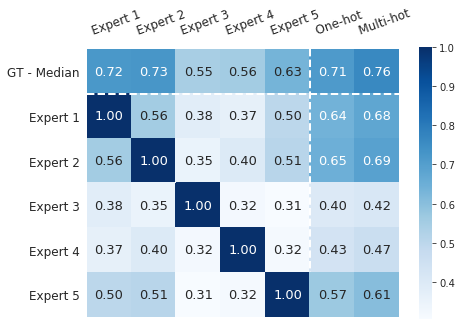

In [8]:
table_df = get_table_metric(public_df, 'kendall', if_highlight=False, positive_pred_bins=False, positive_label_bins=False)
table_df = table_df[['Expert_1', 'Expert_2', 'Expert_3',  'Expert_4',  'Expert_5', 'One-hot_mean', 'Multi-hot_mean']]

Row_list =[]
for index, rows in table_df.iterrows():
    my_list =[rows['Expert_1'], rows['Expert_2'], rows['Expert_3'], rows['Expert_4'], rows['Expert_5'], rows['One-hot_mean'], rows['Multi-hot_mean']]
    Row_list.append(my_list)

plot_corr_map(Row_list, save_path=None, masking=False, cmap = 'Blues')

## amae

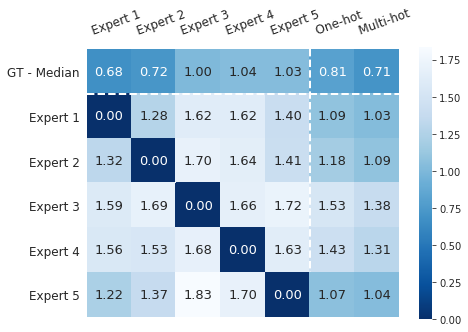

In [9]:
table_df = get_table_metric(public_df, 'amae', if_highlight=False, positive_pred_bins=False, positive_label_bins=False)
table_df = table_df[['Expert_1', 'Expert_2', 'Expert_3',  'Expert_4',  'Expert_5', 'One-hot_mean', 'Multi-hot_mean']]

Row_list =[]
for index, rows in table_df.iterrows():
    my_list =[rows['Expert_1'], rows['Expert_2'], rows['Expert_3'], rows['Expert_4'], rows['Expert_5'], rows['One-hot_mean'], rows['Multi-hot_mean']]
    Row_list.append(my_list)

plot_corr_map(Row_list, save_path=None, masking=False, cmap = 'Blues_r')

# Expert and model agreement on private test set.

In [10]:
private_df_with_ranks = make_ranks_from_private(private_df)    
private_df_with_ranks

,Filename,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,If_cancer,If_interval_cancer,If_large_invasive_cancer,If_composite,...,Final_score_onehot_1,Final_pred_onehot_2,Final_score_onehot_2,Final_pred_onehot_3,Final_score_onehot_3,Final_pred_onehot_4,Final_score_onehot_4,Final_pred_onehot_5,Final_score_onehot_5,Label
0,private_1.png,295.0,361.0,381.0,324.0,179.0,1,0,0,0,...,0.705344,398.0,0.715511,390.0,0.701592,395.0,0.696004,388.0,0.698132,324
1,private_2.png,62.0,209.0,54.0,216.0,74.0,1,0,1,1,...,0.471170,151.0,0.458896,146.0,0.437044,150.0,0.445815,163.0,0.470897,74
2,private_3.png,218.0,204.0,11.0,400.0,466.0,1,1,0,1,...,0.562893,246.0,0.570973,267.0,0.581818,235.0,0.542172,275.0,0.588550,218
3,private_4.png,26.0,15.0,29.0,29.0,13.0,0,0,0,0,...,0.186846,14.0,0.161645,33.0,0.177392,13.0,0.151524,20.0,0.179080,26
4,private_5.png,63.0,73.0,34.0,7.0,15.0,1,1,0,1,...,0.194335,21.0,0.178916,14.0,0.148812,39.0,0.204328,35.0,0.213077,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,private_471.png,156.0,130.0,84.0,196.0,85.0,0,0,0,0,...,0.479554,142.0,0.444838,133.0,0.409813,146.0,0.442289,160.0,0.467797,130
471,private_472.png,11.0,41.0,126.0,17.0,65.0,1,0,1,1,...,0.185920,22.0,0.182992,30.0,0.173001,30.0,0.189235,27.0,0.195058,41
472,private_473.png,441.0,309.0,246.0,355.0,435.0,1,0,0,0,...,0.768053,447.0,0.782051,444.0,0.767772,449.0,0.774517,456.0,0.795413,355
473,private_474.png,162.0,186.0,157.0,278.0,175.0,0,0,0,0,...,0.556208,231.0,0.561838,223.0,0.535418,206.0,0.514486,228.0,0.544993,175


In [11]:
private_df

,Filename,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,If_cancer,If_interval_cancer,If_large_invasive_cancer,If_composite,...,Final_pred_onehot_1,Final_score_onehot_1,Final_pred_onehot_2,Final_score_onehot_2,Final_pred_onehot_3,Final_score_onehot_3,Final_pred_onehot_4,Final_score_onehot_4,Final_pred_onehot_5,Final_score_onehot_5
0,private_1.png,321,388,407,327,201,1,0,0,0,...,8,0.705344,8,0.715511,8,0.701592,5,0.696004,6,0.698132
1,private_2.png,72,236,57,218,80,1,0,1,1,...,4,0.471170,4,0.458896,4,0.437044,4,0.445815,5,0.470897
2,private_3.png,244,231,11,403,494,1,1,0,1,...,4,0.562893,5,0.570973,4,0.581818,4,0.542172,5,0.588550
3,private_4.png,30,17,30,28,13,0,0,0,0,...,2,0.186846,1,0.161645,2,0.177392,1,0.151524,1,0.179080
4,private_5.png,73,89,35,6,16,1,1,0,1,...,2,0.194335,2,0.178916,2,0.148812,2,0.204328,2,0.213077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,private_471.png,179,155,91,197,91,0,0,0,0,...,4,0.479554,4,0.444838,4,0.409813,4,0.442289,4,0.467797
471,private_472.png,11,50,142,16,70,1,0,1,1,...,2,0.185920,2,0.182992,2,0.173001,2,0.189235,2,0.195058
472,private_473.png,470,336,268,358,463,1,0,0,0,...,8,0.768053,8,0.782051,8,0.767772,8,0.774517,8,0.795413
473,private_474.png,185,213,177,280,197,0,0,0,0,...,5,0.556208,5,0.561838,4,0.535418,5,0.514486,4,0.544993


## kendall

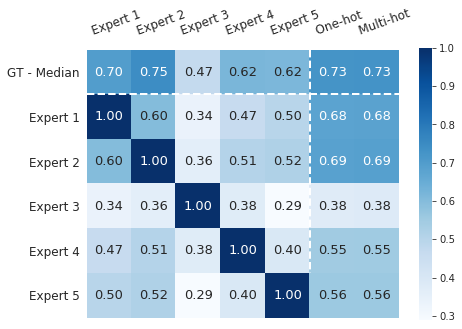

In [12]:
table_df = get_table_metric(private_df_with_ranks, 'kendall', if_highlight=False, positive_pred_bins=False, positive_label_bins=False)
table_df = table_df[['Expert_1', 'Expert_2', 'Expert_3',  'Expert_4',  'Expert_5', 'One-hot_mean', 'Multi-hot_mean']]

Row_list =[]
for index, rows in table_df.iterrows():
    my_list =[rows['Expert_1'], rows['Expert_2'], rows['Expert_3'], rows['Expert_4'], rows['Expert_5'], rows['One-hot_mean'], rows['Multi-hot_mean']]
    Row_list.append(my_list)

plot_corr_map(Row_list, save_path=None, masking=False, cmap = 'Blues')

## amae 

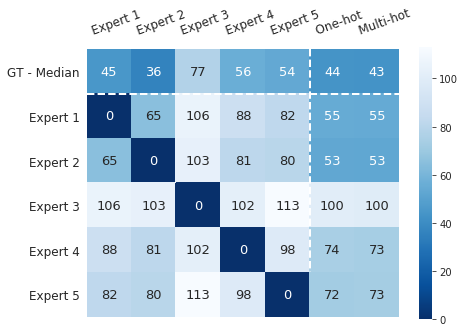

In [13]:
table_df = get_table_metric(private_df_with_ranks, 'amae', if_highlight=False, positive_pred_bins=False, positive_label_bins=False)
table_df = table_df[['Expert_1', 'Expert_2', 'Expert_3',  'Expert_4',  'Expert_5', 'One-hot_mean', 'Multi-hot_mean']]

Row_list =[]
for index, rows in table_df.iterrows():
    my_list =[rows['Expert_1'], rows['Expert_2'], rows['Expert_3'], rows['Expert_4'], rows['Expert_5'], rows['One-hot_mean'], rows['Multi-hot_mean']]
    Row_list.append(my_list)

plot_corr_map(Row_list, save_path=None, masking=False, cmap = 'Blues_r', fmt='.0f')

# AUC on downstream clinical tasks public and private test sets combined.

In [14]:
combined_df = pd.concat([public_df, private_df])
combined_df = combined_df[['Filename', 'If_cancer', 'If_interval_cancer', 'If_large_invasive_cancer', 'If_composite', 'Dicom_image_laterality', 'Dicom_window_center', 'Dicom_window_width', 'Dicom_photometric_interpretation', 'Libra_percent_density', 'Libra_dense_area', 'Libra_breast_area', 'Final_pred_multihot_1', 'Final_score_multihot_1', 'Final_pred_multihot_2', 'Final_score_multihot_2', 'Final_pred_multihot_3', 'Final_score_multihot_3', 'Final_pred_multihot_4', 'Final_score_multihot_4', 'Final_pred_multihot_5', 'Final_score_multihot_5', 'Final_pred_onehot_1', 'Final_score_onehot_1', 'Final_pred_onehot_2', 'Final_score_onehot_2', 'Final_pred_onehot_3', 'Final_score_onehot_3', 'Final_pred_onehot_4', 'Final_score_onehot_4', 'Final_pred_onehot_5', 'Final_score_onehot_5']]
combined_df

,Filename,If_cancer,If_interval_cancer,If_large_invasive_cancer,If_composite,Dicom_image_laterality,Dicom_window_center,Dicom_window_width,Dicom_photometric_interpretation,Libra_percent_density,...,Final_pred_onehot_1,Final_score_onehot_1,Final_pred_onehot_2,Final_score_onehot_2,Final_pred_onehot_3,Final_score_onehot_3,Final_pred_onehot_4,Final_score_onehot_4,Final_pred_onehot_5,Final_score_onehot_5
0,test_1.png,0,0,0,0,L,2047,4096,MONOCHROME2,22.910905,...,4,0.368969,4,0.404699,3,0.311516,4,0.393859,3,0.343067
1,test_2.png,1,1,1,1,L,2047,4096,MONOCHROME2,10.744111,...,3,0.388099,4,0.437463,4,0.468396,4,0.399747,3,0.408479
2,test_3.png,1,0,0,0,L,2047,4096,MONOCHROME2,27.862025,...,8,0.835989,8,0.849987,8,0.831522,8,0.829876,8,0.810233
3,test_4.png,0,0,0,0,L,2047,4096,MONOCHROME2,10.673160,...,4,0.501845,4,0.524442,5,0.524184,4,0.533886,4,0.507303
4,test_5.png,0,0,0,0,L,2047,4096,MONOCHROME2,9.860717,...,4,0.393345,4,0.434633,4,0.401445,5,0.403187,5,0.474487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,private_471.png,0,0,0,0,L,2047,4096,MONOCHROME2,17.087469,...,4,0.479554,4,0.444838,4,0.409813,4,0.442289,4,0.467797
471,private_472.png,1,0,1,1,R,2047,4096,MONOCHROME2,7.138003,...,2,0.185920,2,0.182992,2,0.173001,2,0.189235,2,0.195058
472,private_473.png,1,0,0,0,R,2047,4096,MONOCHROME2,26.279429,...,8,0.768053,8,0.782051,8,0.767772,8,0.774517,8,0.795413
473,private_474.png,0,0,0,0,L,2047,4096,MONOCHROME2,18.962289,...,5,0.556208,5,0.561838,4,0.535418,5,0.514486,4,0.544993


In [15]:
get_table_metric_downstream_auc(combined_df, if_highlight=True)

,AUC,If_interval_cancer,If_large_invasive_cancer,If_composite,If_interval_cancer_mean,If_large_invasive_cancer_mean,If_composite_mean
0,onehot,0.6321 +- 0.0031,0.5801 +- 0.0013,0.6100 +- 0.0013,0.632100,0.580100,0.610000
1,multihot,0.6331 +- 0.0031,0.5802 +- 0.0019,0.6117 +- 0.0028,0.633100,0.580200,0.611700
2,Libra_percent_density,0.594676,0.525382,0.567786,0.594700,0.525400,0.567800
3,Libra_dense_area,0.590119,0.550460,0.583875,0.590100,0.550500,0.583900
4,Libra_breast_area,0.446294,0.506486,0.480354,0.446300,0.506500,0.480400


# Odds ratio on clinical endpoints with public and private test sets combined.

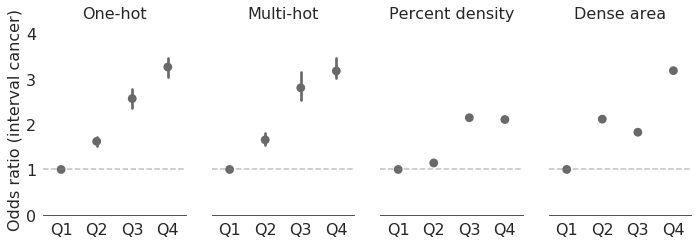

In [16]:
combined_df = df_score_to_bin(combined_df,num_bins=8)
plot_df = get_oddsratio_plots(df=combined_df,save_path=None,target='interval',metric='oddsratio')

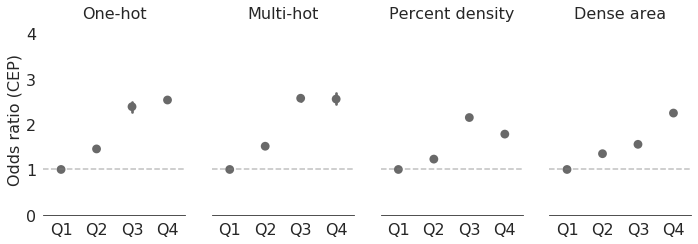

In [17]:
plot_df = get_oddsratio_plots(df=combined_df,save_path=None,target='composite',metric='oddsratio')

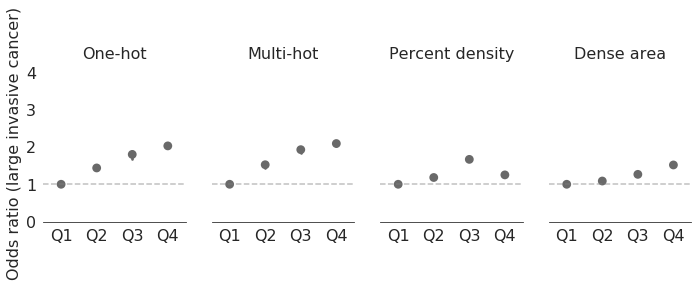

In [18]:
plot_df = get_oddsratio_plots(df=combined_df,save_path=None,target='largeinvasive',metric='oddsratio')

In [19]:
get_table_metric_downstream_oddsratio(df=combined_df,target='interval',metric='oddsratio')

,one-hot,multi-hot,one-hot_mean,multi-hot_mean,Libra_percent_density,Libra_dense_area,Libra_breast_area
0,1,1,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.6196 +- 0.1177,1.6531 +- 0.1451,1.619600,1.653100,1.143400,2.110100,0.613200
2,2.5636 +- 0.2463,2.8011 +- 0.3484,2.563600,2.801100,2.141500,1.821300,0.646800
3,3.2598 +- 0.2407,3.1732 +- 0.2765,3.259800,3.173200,2.101900,3.179300,0.602300


In [20]:
get_table_metric_downstream_oddsratio(df=combined_df,target='composite',metric='oddsratio')

,one-hot,multi-hot,one-hot_mean,multi-hot_mean,Libra_percent_density,Libra_dense_area,Libra_breast_area
0,1,1,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.4532 +- 0.0590,1.5124 +- 0.0433,1.453200,1.512400,1.228500,1.347800,0.848800
2,2.3851 +- 0.1442,2.5712 +- 0.0768,2.385100,2.571200,2.145500,1.554800,0.848800
3,2.5324 +- 0.0275,2.5534 +- 0.1400,2.532400,2.553400,1.780100,2.244300,0.904900


In [21]:
get_table_metric_downstream_oddsratio(df=combined_df,target='interval',metric='pvalue')

,one-hot,multi-hot,one-hot_mean,multi-hot_mean,Libra_percent_density,Libra_dense_area,Libra_breast_area
0,1,1,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.1492 +- 0.0445,0.1409 +- 0.0423,0.149200,0.140900,0.427600,0.027700,0.962600
2,0.0081 +- 0.0064,0.0037 +- 0.0024,0.008100,0.003700,0.013700,0.074100,0.947200
3,0.0005 +- 0.0005,0.0007 +- 0.0003,0.000500,0.000700,0.015900,0.000400,0.967300


In [22]:
get_table_metric_downstream_oddsratio(df=combined_df,target='composite',metric='pvalue')

,one-hot,multi-hot,one-hot_mean,multi-hot_mean,Libra_percent_density,Libra_dense_area,Libra_breast_area
0,1,1,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.1102 +- 0.0274,0.0853 +- 0.0191,0.110200,0.085300,0.256700,0.152000,0.793200
2,0.0006 +- 0.0005,0.0001 +- 0.0001,0.000600,0.000100,0.001100,0.051900,0.793200
3,0.0001 +- 0.0000,0.0002 +- 0.0001,0.000100,0.000200,0.013000,0.000500,0.708400


# Variations in different masking levels using percent density as a proxy on public test set.

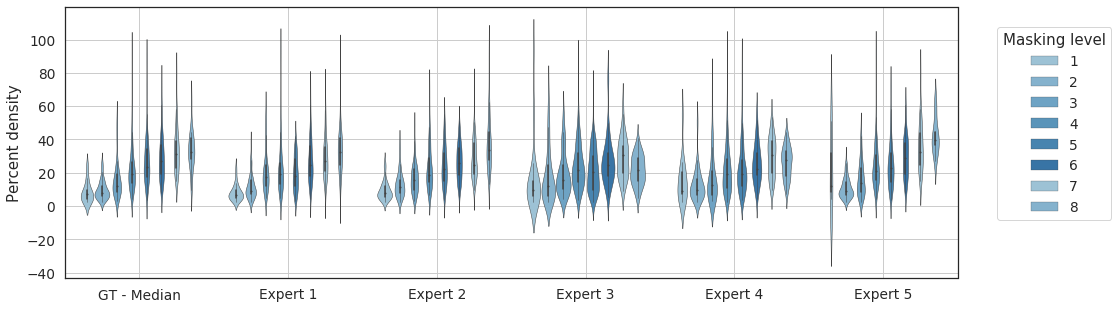

In [23]:
make_variations_violin_plot(public_df, save_path=None)   

# Expert and model agreement in different masking levels on public test set.

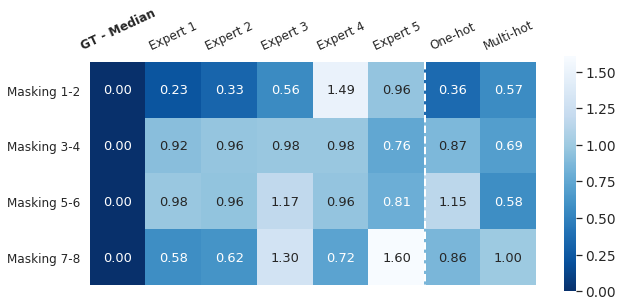

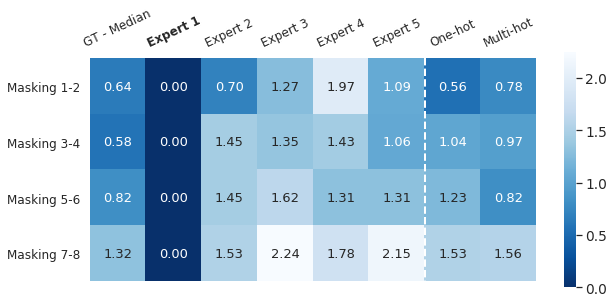

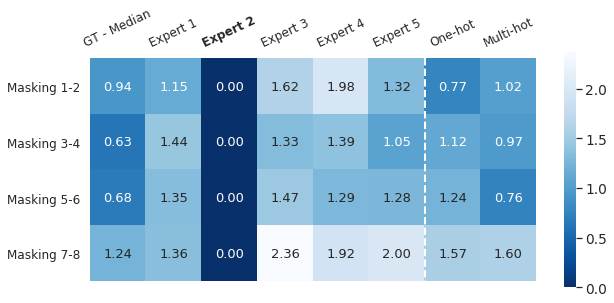

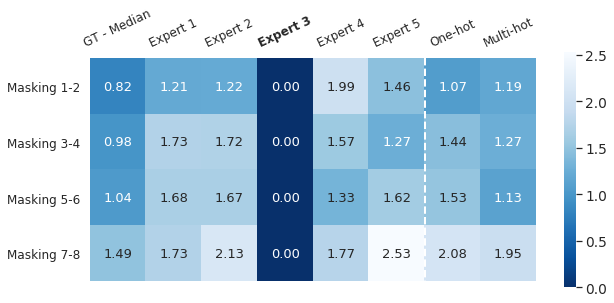

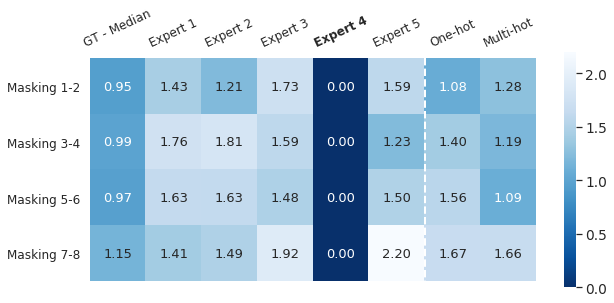

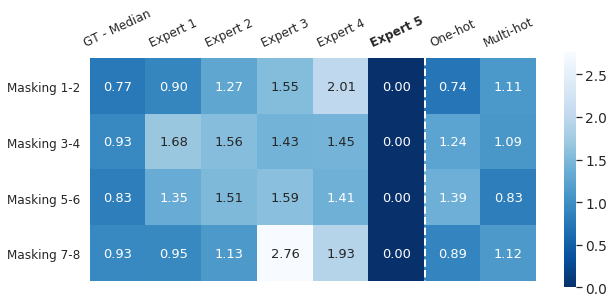

In [24]:
column_index = 0
for gt_column in ['Label', 'Expert_1', 'Expert_2', 'Expert_3', 'Expert_4', 'Expert_5']:
    rows = ['Label', 'Expert_1', 'Expert_2', 'Expert_3', 'Expert_4', 'Expert_5', 'One-hot', 'Multi-hot']
    columns = ['Masking 1-2', 'Masking 3-4', 'Masking 5-6', 'Masking 7-8']
    all_list = get_metric_separate_masking_levels(public_df, gt_column, rows, columns, 'amae')
    plot_metric_separate_masking_levels(all_list, columns=columns, save_path=None, vmax=None, cmap='Blues_r', fmt=".2f", which_bold=column_index)
    column_index+=1